In [124]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics as m

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




In [125]:


diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=diabetes_data.iloc[:, :-1]
y=diabetes_data.iloc[:,-1]

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

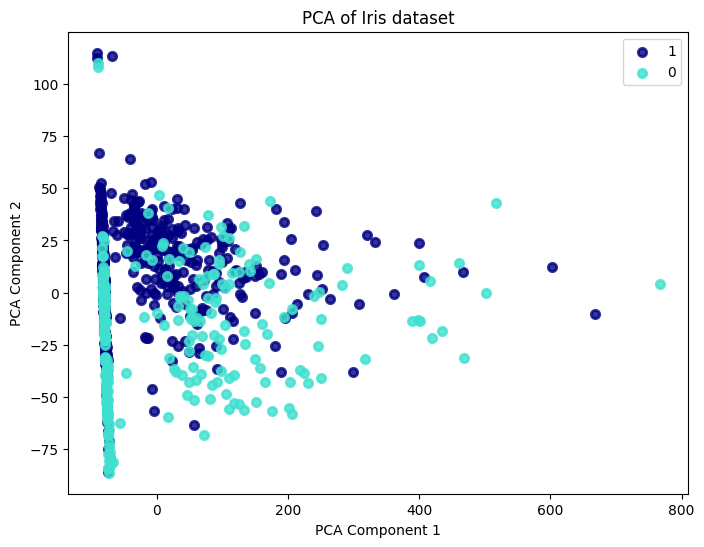

In [21]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Crear un gráfico de dispersión para visualizar los resultados en 2D
plt.figure(figsize=(8, 6))  
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], diabetes_data.Outcome):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, color=color,
                label=target_name, linewidths=lw)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris dataset')

plt.show()

In [22]:
ordered_data = diabetes_data.sort_values('Outcome')
ordered_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90,62,18,59,25.1,1.268,25,0
465,0,124,56,13,105,21.8,0.452,21,0
466,0,74,52,10,36,27.8,0.269,22,0
467,0,97,64,36,100,36.8,0.600,25,0
469,6,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,1
485,0,135,68,42,250,42.3,0.365,24,1
484,0,145,0,0,0,44.2,0.630,31,1
186,8,181,68,36,495,30.1,0.615,60,1


### 2

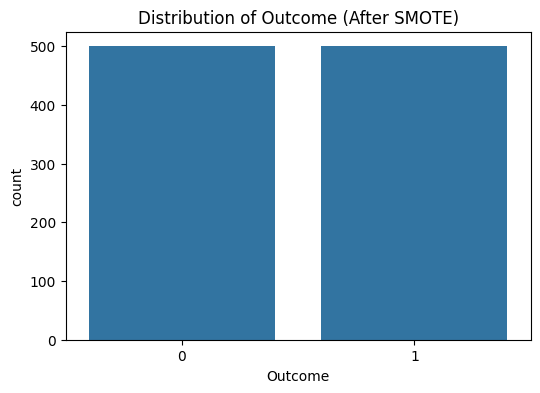

In [80]:


X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.5, random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
680,2,56,56,28,45,24.200000,0.332000,22
177,0,129,110,46,130,67.100000,0.319000,26
395,2,127,58,24,275,27.700000,1.600000,25
911,0,118,85,41,223,45.668376,0.720137,29
793,1,196,69,45,543,30.715097,0.167833,52
...,...,...,...,...,...,...,...,...
106,1,96,122,0,0,22.400000,0.207000,27
270,10,101,86,37,0,45.600000,1.136000,38
860,1,115,70,29,96,34.503341,0.520052,32
435,0,141,0,0,0,42.400000,0.205000,29


In [82]:
y_train

680    0
177    1
395    0
911    1
793    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Outcome, Length: 500, dtype: int64

In [83]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
521,3,124,80,33,130,33.200000,0.305000,26
737,8,65,72,23,0,32.000000,0.600000,42
740,11,120,80,37,150,42.300000,0.785000,48
660,10,162,84,0,0,27.700000,0.182000,54
411,1,112,72,30,176,34.400000,0.528000,25
...,...,...,...,...,...,...,...,...
178,5,143,78,0,0,45.000000,0.190000,47
444,4,117,62,12,0,29.700000,0.380000,30
416,1,97,68,21,0,27.200000,1.095000,22
870,7,195,75,29,280,37.507767,0.591369,56


### 3

In [84]:
# Índices de las muestras con la etiqueta 0 (negativo)
indices_zeros = (y_train == 0)

# Índices de las muestras con la etiqueta 1 (positivo)
indices_ones = (y_train == 1)

# Subconjunto de X_train con muestras etiquetadas como 0
X_train_zeros = X_train[indices_zeros]

# Subconjunto de X_train con muestras etiquetadas como 1
X_train_ones = X_train[indices_ones]

X_train_zeros


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
680,2,56,56,28,45,24.2,0.332,22
395,2,127,58,24,275,27.7,1.600,25
684,5,136,82,0,0,0.0,0.640,69
383,1,90,62,18,59,25.1,1.268,25
751,1,121,78,39,74,39.0,0.261,28
...,...,...,...,...,...,...,...,...
20,3,126,88,41,235,39.3,0.704,27
700,2,122,76,27,200,35.9,0.483,26
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27


In [85]:
X_train_ones

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
177,0,129,110,46,130,67.100000,0.319000,26
911,0,118,85,41,223,45.668376,0.720137,29
793,1,196,69,45,543,30.715097,0.167833,52
960,5,162,61,27,489,34.209002,0.727270,37
956,0,123,0,0,0,36.078745,0.184941,24
...,...,...,...,...,...,...,...,...
214,9,112,82,32,175,34.200000,0.260000,36
614,11,138,74,26,144,36.100000,0.557000,50
270,10,101,86,37,0,45.600000,1.136000,38
860,1,115,70,29,96,34.503341,0.520052,32


In [86]:
X_train_zeros_array = X_train_zeros.values
X_train_zeros_array

array([[  2.   ,  56.   ,  56.   , ...,  24.2  ,   0.332,  22.   ],
       [  2.   , 127.   ,  58.   , ...,  27.7  ,   1.6  ,  25.   ],
       [  5.   , 136.   ,  82.   , ...,   0.   ,   0.64 ,  69.   ],
       ...,
       [  5.   , 139.   ,  64.   , ...,  28.6  ,   0.411,  26.   ],
       [  1.   ,  96.   , 122.   , ...,  22.4  ,   0.207,  27.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [87]:
X_train_ones_array = X_train_ones.values
X_train_ones_array

array([[0.00000000e+00, 1.29000000e+02, 1.10000000e+02, ...,
        6.71000000e+01, 3.19000000e-01, 2.60000000e+01],
       [0.00000000e+00, 1.18000000e+02, 8.50000000e+01, ...,
        4.56683759e+01, 7.20136926e-01, 2.90000000e+01],
       [1.00000000e+00, 1.96000000e+02, 6.90000000e+01, ...,
        3.07150968e+01, 1.67832998e-01, 5.20000000e+01],
       ...,
       [1.00000000e+01, 1.01000000e+02, 8.60000000e+01, ...,
        4.56000000e+01, 1.13600000e+00, 3.80000000e+01],
       [1.00000000e+00, 1.15000000e+02, 7.00000000e+01, ...,
        3.45033413e+01, 5.20052166e-01, 3.20000000e+01],
       [0.00000000e+00, 1.41000000e+02, 0.00000000e+00, ...,
        4.24000000e+01, 2.05000000e-01, 2.90000000e+01]])

In [88]:
print("---------- Para los zeros: -------------------")

u_zeros = np.mean(X_train_zeros_array, axis=0) # Media de zeros
print("La Media es: ",u_zeros)

cov_zeros = np.diag(np.diag(np.cov(X_train_zeros_array, rowvar=False))) # Covarianza zeros
print("La Covarianza es: ",cov_zeros)

inv_cov_zeros = np.linalg.inv(cov_zeros)  # Inversa de la covarianza zeros
print("La Inversa de la cov es: ",inv_cov_zeros)

det_cov_zeros = np.linalg.det(cov_zeros) # Determinante de la covarianza zeros
print("El Determinante es: ",det_cov_zeros)

# print("---------- Para los ones: -------------------")

# # Media de onescolor
u_ones = np.mean(X_train_ones_array, axis=0)
cov_ones = np.diag(np.diag(np.cov(X_train_ones_array, rowvar=False))) # Covarianza ones
inv_cov_ones = np.linalg.inv(cov_ones) # Inversa de la covarianza ones
det_cov_ones = np.linalg.det(cov_ones) # Determinante de la covarianza ones

print("Media_ones:", u_ones)
print( "Cov_ones: \n", cov_ones)
print("Inv Cov_ones: \n", inv_cov_ones)
print("Det Cov_ones:", det_cov_ones)

---------- Para los zeros: -------------------
La Media es:  [  3.05957447 110.54893617  70.84680851  20.31914894  70.12340426
  30.57744681   0.43842979  30.24680851]
La Covarianza es:  [[8.30412802e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.35385416e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.81608911e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.13619931e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.10972402e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.63085063e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 

In [92]:
# Recorriendo los índices
Y_result=np.zeros(500)

X_train_array=X_train.values
y_train_array= y_train.values
X_test_array=X_test.values
y_test_array= y_test.values

for i in range(len(X_test_array)):
    #print(X_Test_total[i])
    # Calcular la fórmula de la gaussiana
    x=X_test_array[i]
    diff_zeros = x - u_zeros
    exponent_zeros = -0.5 * np.dot(np.dot(diff_zeros, inv_cov_zeros), diff_zeros.T)
    #print(exponent_zeros)
    denominator_zeros = (2 * math.pi) * math.sqrt(det_cov_zeros)
    gaussian_zeros = (1 / denominator_zeros) * math.exp(exponent_zeros)

    diff_ones = x - u_ones
    exponent_ones = -0.5 * np.dot(np.dot(diff_ones, inv_cov_ones), diff_ones.T)
    denominator_ones = (2 * math.pi) * math.sqrt(det_cov_ones)
    gaussian_ones = (1 / denominator_ones) * math.exp(exponent_ones)

    if gaussian_zeros>gaussian_ones:
      Y_result[i]=0
    elif gaussian_ones>gaussian_zeros:
      Y_result[i]=1
    
print(y_test_array)
print(Y_result)

#Y_Test_total+Y_result

[0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 

In [93]:

bayes_precision=accuracy_score(y_test_array,Y_result)
bayes_precision

0.73

Matriz de confusión:
[[193  72]
 [ 63 172]]


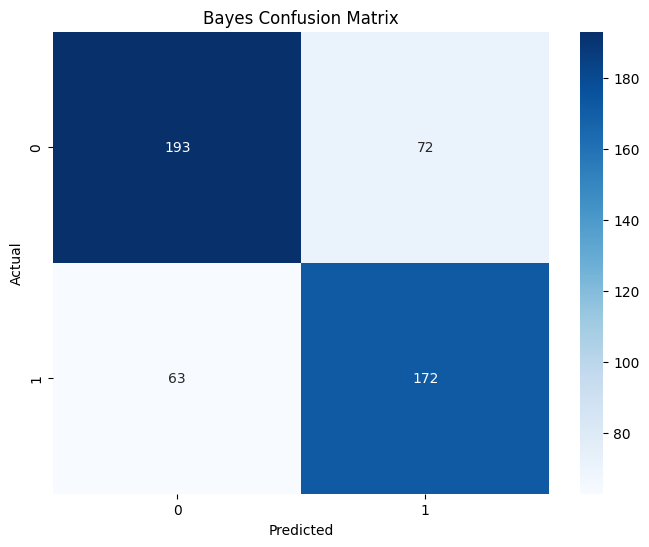

In [126]:


# Construir la matriz de confusión
confusion = m.confusion_matrix(y_test_array, Y_result)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bayes Confusion Matrix')
plt.show()

In [78]:
#Bayes por funciones importadas

bayes = GaussianNB()
bayes.fit(X_train_array, y_train_array)
bayes_predictions=bayes.predict(X_test_array)
bayes_precision=accuracy_score(y_test_array,bayes_predictions)
bayes_precision

0.728

In [77]:
cm = m.confusion_matrix(y_test_array, bayes_predictions)
cm

array([[189,  76],
       [ 60, 175]], dtype=int64)

### SVM

In [95]:

svm = SVC()
svm.fit(X_train_array, y_train_array)
svm_predictions = svm.predict(X_test_array)
svm_precision = accuracy_score(y_test_array, svm_predictions)
svm_precision

0.75

Matriz de confusión:
[[183  82]
 [ 43 192]]


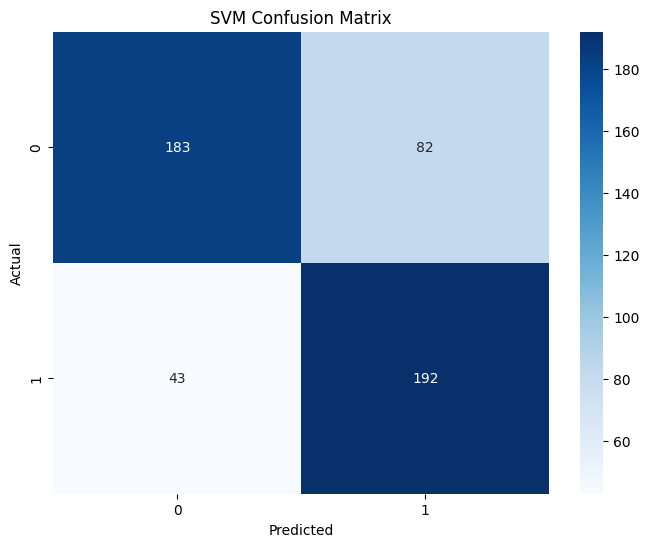

In [127]:

# Construir la matriz de confusión
confusion = m.confusion_matrix(y_test_array, svm_predictions)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### Logistic Regresion


In [96]:

logist = LogisticRegression(max_iter=2000)
logist.fit(X_train_array, y_train_array)
logist_predictions = logist.predict(X_test_array)
logist_precision = accuracy_score(y_test_array, logist_predictions)
logist_precision

0.746

Matriz de confusión:
[[182  83]
 [ 44 191]]


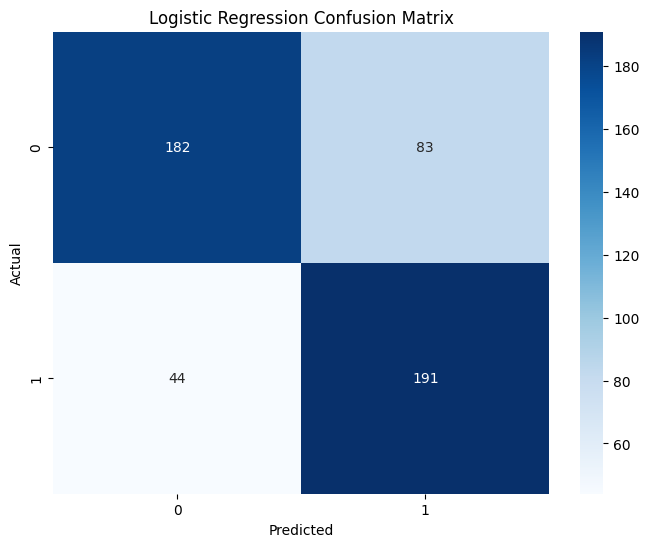

In [128]:
# Construir la matriz de confusión
confusion = m.confusion_matrix(y_test_array, logist_predictions)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Curvas ROC

In [109]:
bayes_y_pred_prob = bayes.predict_proba(X_test_array)[:,1]
bayes_y_pred_prob

lr_y_pred_prob = logist.predict_proba(X_test_array)[:,1]
lr_y_pred_prob

# Calcular las distancias firmadas para SVM
svm_decision = svm.decision_function(X_test_array)

# Aplicar alguna función de calibración, por ejemplo, la función sigmoide
svm_y_pred_prob = 1 / (1 + np.exp(-svm_decision))


#svm_y_pred_prob = svm.predict_proba(X_test_array)[:,1]
#svm_y_pred_prob


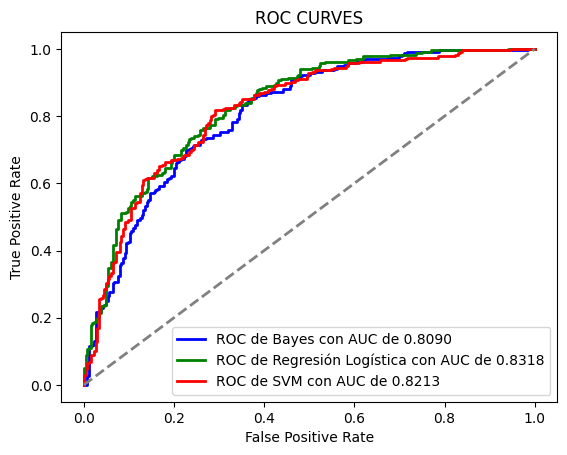

(0.8089763147330389, 0.8317784022480931, 0.8213408269771175)

In [129]:



bayes_fpr, bayes_tpr, bayes_thresholds = roc_curve(y_test_array, bayes_y_pred_prob)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test_array, lr_y_pred_prob)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test_array, svm_y_pred_prob)


bayes_auc_score = roc_auc_score(y_test_array, bayes_y_pred_prob)
lr_auc_score = roc_auc_score(y_test_array, lr_y_pred_prob)
svm_auc_score = roc_auc_score(y_test_array, svm_y_pred_prob)


plt.figure()

# Curva ROC de Bayes
plt.plot(bayes_fpr, bayes_tpr, color='blue', lw=2, label='ROC de Bayes con AUC de %0.4f' % bayes_auc_score)

# Curva ROC de Regresión Logística
plt.plot(lr_fpr, lr_tpr, color='green', lw=2, label='ROC de Regresión Logística con AUC de %0.4f' % lr_auc_score)

# Curva ROC de SVM
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='ROC de SVM con AUC de %0.4f' % svm_auc_score)

# Línea de referencia
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')



plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVES")
plt.legend(loc="lower right")
plt.show()

bayes_auc_score,lr_auc_score,svm_auc_score
